In [9]:
import numpy as np

age = np.array([31, 33, 24, 26, 35])

salary = np.array([2500000, 2500000, 2000000, 2200000, 240000000])

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(age.reshape(-1, 1), salary)

LinearRegression()

In [13]:
reg.coef_

array([14274654.37788019])

In [14]:
reg.intercept_

-375544700.4608296

In [15]:
reg.score(age.reshape(-1, 1), salary)

0.39129189191583336

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('tips')

In [17]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
features = df[['total_bill', 'size']]
target = df['tip']

In [19]:
model = LinearRegression()

In [20]:
model.fit(features, target)

LinearRegression()

In [23]:
model.score(features, target)

0.46786930879612587

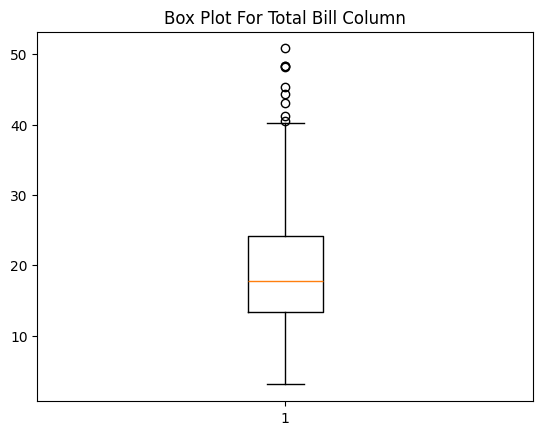

In [24]:
plt.boxplot(df['total_bill'])
plt.title('Box Plot For Total Bill Column')
plt.show()

<Axes: xlabel='total_bill', ylabel='Count'>

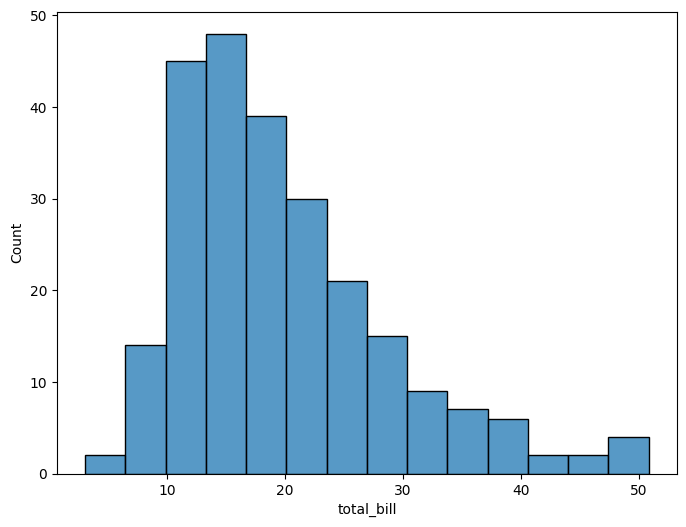

In [29]:
plt.figure(figsize = (8, 6))
sns.histplot(df['total_bill'])

Method One Z score method

In [42]:
data = df['total_bill']
mean = np.mean(data)
std = np.std(data)
outlier_upper = [i for i in data if i > mean+3*std]
outlier_upper

[48.27, 48.17, 50.81, 48.33]

In [43]:
lower_outlier = [z for z in data if z < mean-3*std]
lower_outlier

[]

Method Two IQR Method

In [44]:
data1 = sorted(data)

q1 = np.percentile(data1, 25)
q3 = np.percentile(data1, 75)
IQR = q3 - q1
lower = q1-(1.5*IQR)
upper = q3+(1.5*IQR)

In [45]:
outliers = [i for i in data1 if i > upper or i < lower]
outliers

[40.55, 41.19, 43.11, 44.3, 45.35, 48.17, 48.27, 48.33, 50.81]

Method three z-Score with threshold

In [46]:
threshold = 2.5

mean = np.mean(data)
std = np.std(data)
outliers = [i for i in data if (i - mean)/std > threshold or (i - mean)/std < -threshold]
outliers

[48.27, 44.3, 48.17, 50.81, 45.35, 43.11, 48.33]

Method Four boundry method

In [50]:
t5percent = np.percentile(data, 2)
t95percent = np.percentile(data, 98)
outliers = [i for i in data if i > t95percent or i < t5percent]
outliers

[48.27, 3.07, 5.75, 7.25, 7.51, 48.17, 50.81, 7.25, 45.35, 48.33]

Removing Outliers

method 1 log method

In [51]:
df['log10base'] = np.log(df['total_bill'])

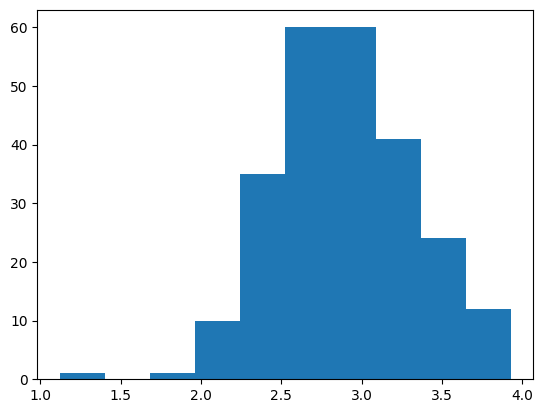

In [52]:
plt.hist(df['log10base'])
plt.title("")
plt.show()

In [54]:
feature = df[['log10base', 'size']]
target = df['tip']

In [55]:
reg =LinearRegression()

In [56]:
reg.fit(feature, target)

LinearRegression()

In [57]:
reg.score(feature, target)

0.4446056122194971